# Time series feature extraction: Fourier and Wavelet transform  
Use case: ECG classification

### ABSTRACT
In this article we propose a basic review of features extraction on time series and signals taking advantage of Fourier and Wavelet transforms. However, it is worth to mention that these two techniques are the visible part of the iceberg because signal processing is a widespread field, [Book][1].
In a second step we will use the transformed signals to train a classification model. To carry
out this task, we will work with a particular data set to serve as a guide during the article, an electrocardiogram (ECG).

[1]:http://dsp-book.narod.ru/SATFSS1.pdf

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft

In [2]:
# source : 'https://www.mathworks.com/help/wavelet/examples/signal-classification-with-wavelet-analysis-and-convolutional-neural-networks.html'
# Create list of data and labels from dictionary
data = loadmat("../article_fft/data/physionet_ECG_data-master/ECGData/ECGData.mat")

ecg_total = len(data['ECGData']['Data'])
ecg_data = []
ecg_labels = []
for i in range(0, ecg_total):
    ecg_data.append(data['ECGData']['Data'][i])
    ecg_labels.append(data['ECGData']['Labels'][i])

flat_list_ecg_labels = [item for sublist in ecg_labels for item in sublist]

Text(0.5, 1.0, 'NSR Signal')

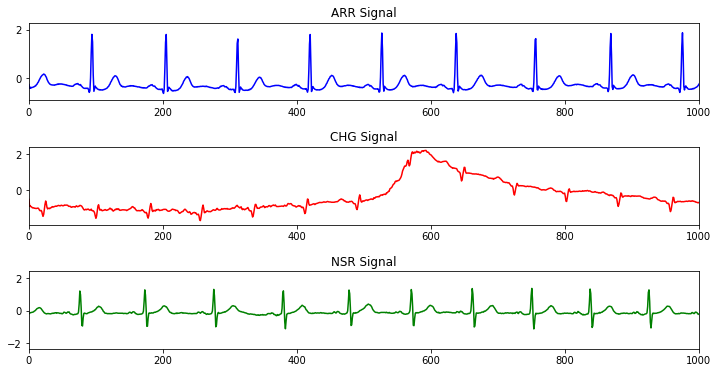

In [3]:
# Data Visualization

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 1, hspace=0.6)

arr_signal = fig.add_subplot(grid[0, 0])
chg_signal = fig.add_subplot(grid[1, 0])
nsr_signal = fig.add_subplot(grid[2, 0])

arr_signal.plot(range(0, len(data['ECGData']['Data'][33]), 1), ecg_data[33], color = 'blue')
arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

chg_signal.plot(range(0, len(data['ECGData']['Data'][100]), 1), ecg_data[100], color = 'red')
chg_signal.set_xlim(0, 1000)
chg_signal.set_title('CHG Signal')

nsr_signal.plot(range(0, len(data['ECGData']['Data'][150]), 1), ecg_data[150], color = 'green')
nsr_signal.set_xlim(0, 1000)
nsr_signal.set_title('NSR Signal')

#fig.savefig('Figure_1.png')   # save the figure to file
#plt.close(fig)

In [4]:
#Sythetic data generation and FFT 

N = 10000
x_values = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
    

full_signal_values = (y_values_0 + y_values_1 - y_values_2)
full_signal_fft_values = fft(full_signal_values)
full_signal_fft_values = (2/N) * np.abs(full_signal_fft_values)

Text(8, 3, 'Second\ncomponent')

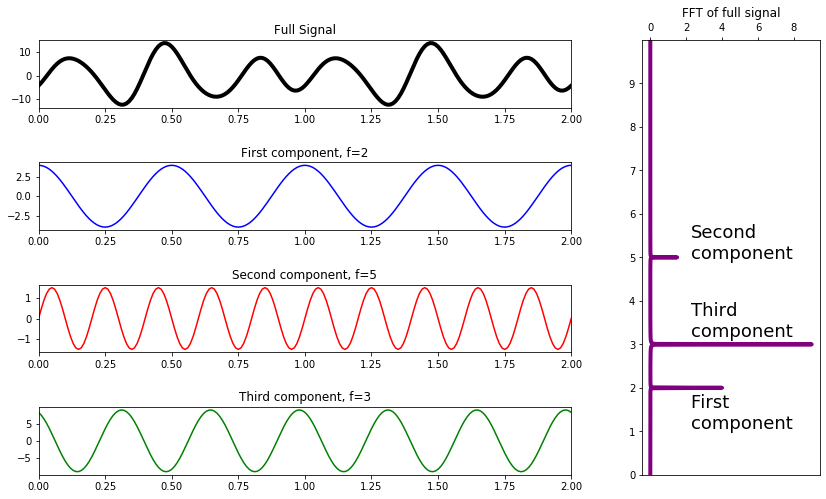

In [5]:
# Plot FFT results of synthetic data

fig = plt.figure(figsize=(14, 8))
widths = [3, 1]
heights = [1, 1, 1, 1]
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.8, width_ratios=widths, height_ratios=heights)

full_signal = fig.add_subplot(grid[0, 0])
first_comp = fig.add_subplot(grid[1, 0])
second_comp = fig.add_subplot(grid[2, 0])
third_comp = fig.add_subplot(grid[3, 0])
fft_result = fig.add_subplot(grid[0:, 1])

#Synthetic data
full_signal.plot(list(x_values), list(full_signal_values), color='black', linewidth=4)
full_signal.set_xlim(0, 2)
full_signal.set_title('Full Signal')
first_comp.plot(list(x_values), list(y_values_0), color = 'blue')
first_comp.set_xlim(0, 2)
first_comp.set_title('First component, f=2')
second_comp.plot(list(x_values), list(y_values_1), color = 'red')
second_comp.set_xlim(0, 2)
second_comp.set_title('Second component, f=5')
third_comp.plot(list(x_values), list(y_values_2), color = 'green')
third_comp.set_xlim(0, 2)
third_comp.set_title('Third component, f=3')

#FFT
fft_result.xaxis.tick_top()
fft_result.plot(list(full_signal_fft_values), list(x_values), color = 'purple', linewidth=4)
fft_result.set_ylim(0, 10)
fft_result.set_yticks(np.arange(0, 10, step=1))
fft_result.set_title('FFT of full signal')
fft_result.annotate('First\ncomponent',
            xy=(1.8, 1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)
fft_result.annotate('Third\ncomponent',
            xy=(1.8, 3.1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

fft_result.annotate('Second\ncomponent',
            xy=(1.8, 4.9), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

#fig.savefig('Figure_2.png')   # save the figure to file
#plt.close(fig)

Text(0.5, 1.0, 'FFT of full signal')

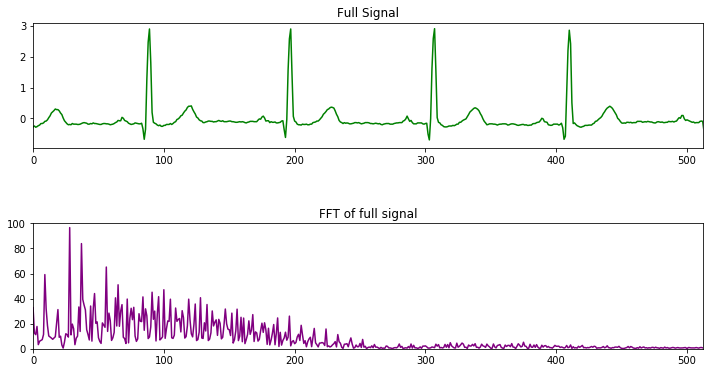

In [16]:
#Arr signal Fourier Transform
nn = 160
signal_length = 1000
full_signal_fft_values = np.abs(fft(ecg_data[nn][:signal_length]))
x_values_fft = range(0, len(data['ECGData']['Data'][nn]), 1)[:signal_length]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, ecg_data[nn][:signal_length], color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')

#fig.savefig('Figure_3.png')   # save the figure to file
#plt.close(fig)

**Fourier Transform**

\begin{equation*}
F(k)= \int_{-\infty}^{+\infty} e^{-2\pi ikt} x(t) dt
\end{equation*}

## Wavelet

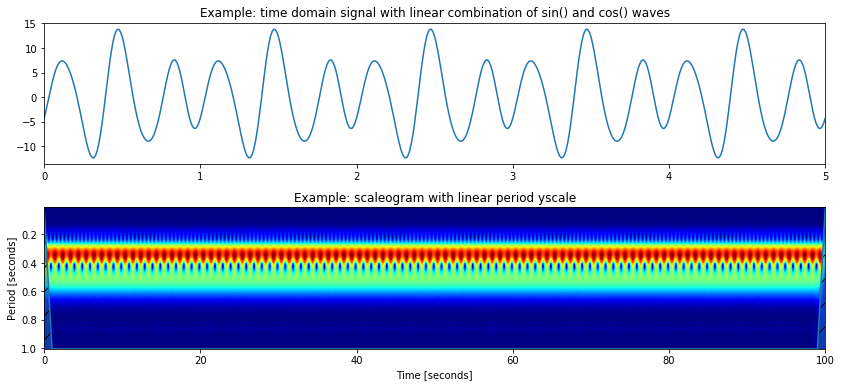

In [19]:
# Example of Wavelet transform for Synthetic data
N = 10000
x_values_wvt = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
full_signal_values = (y_values_0 + y_values_1 - y_values_2)

wavelet='cmor0.7-1.5'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)
ax1.plot(x_values_wvt, full_signal_values); ax1.set_xlim(0, 5)
ax1.set_title('Example: time domain signal with linear combination of sin() and cos() waves')
ax2 = scg.cws(x_values_wvt, full_signal_values, scales=np.arange(1, 150), wavelet=wavelet,
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Example: scaleogram with linear period yscale')


### Wavelet transform

\begin{equation*}
 S(a, b)  =  \frac{1}{\sqrt a} \int_{-\infty}^{+\infty} x(t) \bar{\phi}(\frac{t-b}{a}) dt
\end{equation*}

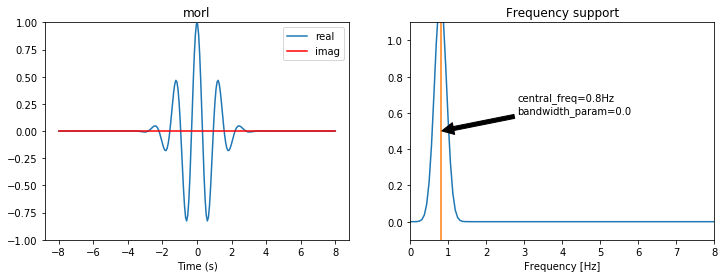

In [6]:
#Morlet wavelet
axes = scg.plot_wav('morl', figsize=(12,4))

### Wavelet family

In [18]:
pywt.families(False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

**Family of Wavelets :**   
'Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets'.


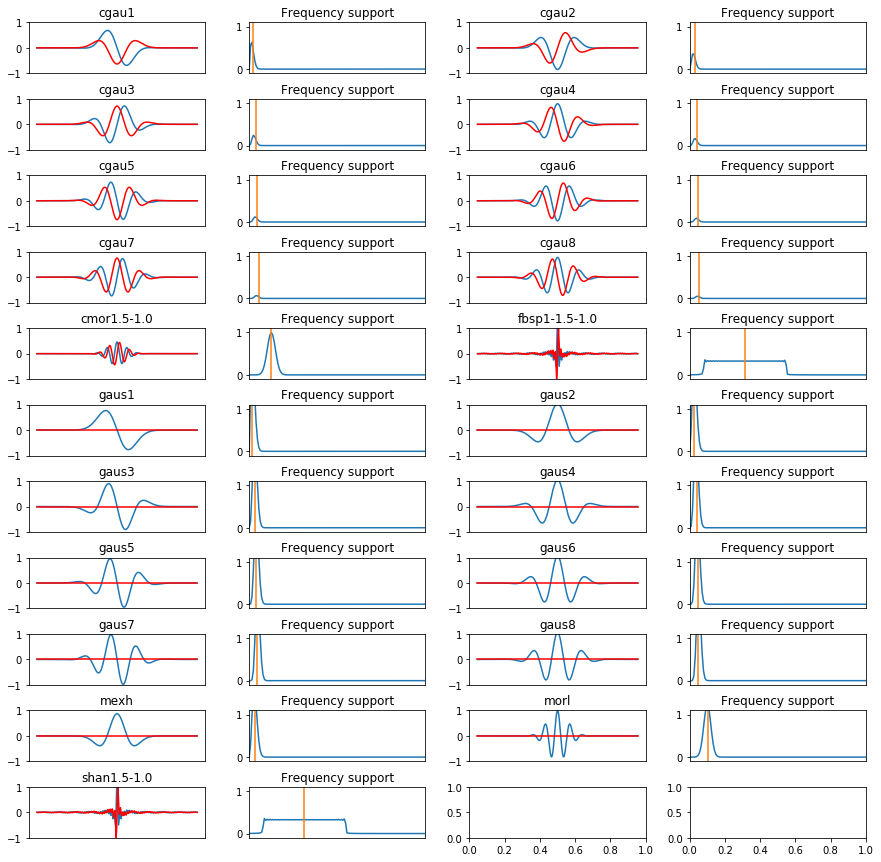

In [19]:
scg.plot_wavelets(figsize=(15,15))

# Scaleogram

Default wavelet function used to compute the transform: morl ( Morlet wavelet )


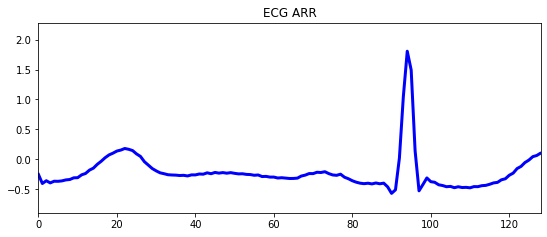

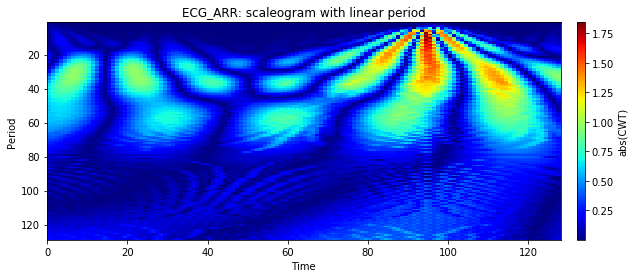

In [42]:
# choose default wavelet function 
scg.set_default_wavelet('morl')

nn = 33
signal_length = 128
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period'); 

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")



https://docs.scipy.org/doc/scipy/reference/signal.html   #window-functions

# Classification

In [43]:
#Preparing data
arr_list = ecg_data[0:95]
chf_list = ecg_data[96:125]
nsr_list = ecg_data[126:162]

arr_split_256 = [np.array_split(arr_list[ii], 256) for ii in range(95)]
arr_flatten = [item for sublist in arr_split_256 for item in sublist]

chf_split_256 = [np.array_split(chf_list[ii], 256) for ii in range(29)]
chf_flatten = [item for sublist in chf_split_256 for item in sublist]

nsr_split_256 = [np.array_split(nsr_list[ii], 256) for ii in range(36)]
nsr_flatten = [item for sublist in nsr_split_256 for item in sublist]

In [44]:
reduce_size = 500
full_1500 = (arr_flatten[0:reduce_size] + chf_flatten[0:reduce_size] + nsr_flatten[0:reduce_size])

In [45]:
# create the data set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


fs = len(full_1500[0])
sgn_length = 2000   #65536   Pay atention with ram memory! 
size_dataset = len(full_1500)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 500 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = full_1500[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

0 done!
500 done!
1000 done!


In [46]:
list_ecg_labels_arr = ['ARR']*reduce_size 
list_ecg_labels_chf = ['CHF']*reduce_size 
list_ecg_labels_nsr = ['NSR']*reduce_size 
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
ecg_labels_encoded = le.fit_transform(list_ecg_labels)
X_train, X_test, y_train, y_test = train_test_split(X_full, ecg_labels_encoded, test_size=0.25, random_state=42)

## Training the ECG classifier with scaleograms

In [47]:
import sys
from tensorflow import keras

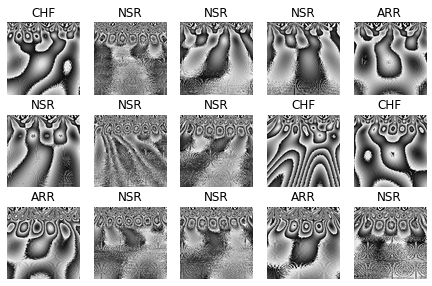

In [49]:
#Inspecting DATA
n_rows = 3
n_cols = 5
class_names = ['ARR', 'CHF', 'NSR']
plt.figure(figsize=(n_cols*1.5, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow((X_train[index]*255).astype(np.uint8), cmap="binary", interpolation="spline36")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

In [50]:
# Defining basic NN
num_filter, num_classes = 3, 3
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[fs-1, fs-1, num_filter]),
    keras.layers.Dense(300, activation="relu"),                 
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 195075)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               58522800  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 58,553,203
Trainable params: 58,553,203
Non-trainable params: 0
_________________________________________________________________


### Install pydot and graphviz for `pydotprint` to work

keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [52]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

W1111 15:02:40.565558 139695680526144 deprecation.py:323] From /home/marisa/.local/share/virtualenvs/tests/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1125 samples, validate on 375 samples
Epoch 1/10
1125/1125 [==============================] - 7s 7ms/sample - loss: 1.1894 - accuracy: 0.6916 - val_loss: 0.3519 - val_accuracy: 0.7973
Epoch 2/10
1125/1125 [==============================] - 7s 6ms/sample - loss: 0.3232 - accuracy: 0.8622 - val_loss: 0.3796 - val_accuracy: 0.7973
Epoch 3/10
1125/1125 [==============================] - 7s 6ms/sample - loss: 0.1888 - accuracy: 0.9396 - val_loss: 0.2335 - val_accuracy: 0.9173
Epoch 4/10
1125/1125 [==============================] - 7s 6ms/sample - loss: 0.1102 - accuracy: 0.9716 - val_loss: 0.2041 - val_accuracy: 0.9360
Epoch 5/10
1125/1125 [==============================] - 7s 6ms/sample - loss: 0.0710 - accuracy: 0.9822 - val_loss: 0.1438 - val_accuracy: 0.9520
Epoch 6/10
1125/1125 [==============================] - 7s 6ms/sample - loss: 0.0504 - accuracy: 0.9893 - val_loss: 0.1431 - val_accuracy: 0.9547
Epoch 7/10
1125/1125 [==============================] - 7s 6ms/sample - loss:

In [53]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 1s 2ms/sample - loss: 0.1425 - accuracy: 0.9627


[0.1425459127003948, 0.9626667]

In [54]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('epochs', size = 16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('Figure_epochs.png')   
    plt.close()

In [55]:
plot_learning_curves(history)

In [56]:
prediction = model.predict(X_test)
pred_classes = prediction.argmax(axis=1)

In [57]:
# Confusion Matrix With Scikit
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_classes)
cm_norm =  cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Text(189.2400000000001, 0.5, 'True')

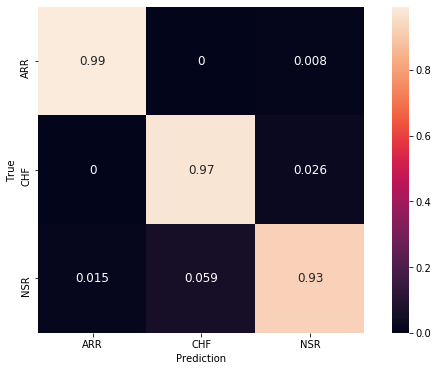

In [58]:
# Ploting Confusion Matrix

df_cm = pd.DataFrame(cm_norm, ['ARR', 'CHF', 'NSR'], ['ARR', 'CHF', 'NSR'])
plt.figure(figsize = (10,6))
conf = sns.heatmap(df_cm, annot=True, square=True, annot_kws={"size": 12})
conf.set_xlabel('Prediction')
conf.set_ylabel('True')

# Summary

In this article we have seen two different ways to extact features from signals based on time dependence of frequency distribution, Fourier and Wavelet transforms. These functions transform a signal from the time-domain to the frequency-domain and give us its frequency spectrum.

We have learnt that Fourier transform is the most convenient tool when signal frequencies do not change in time. However, if the composante frequencies of the signal vary in time the most performant technique is a wavelet transform. The last case allows us to explore the frequency domain of the signal as an image by formating the result as an scaleogram and then take advantage of image classification techniques, as CNN. Based on ECG data, we made a classification over three groups of people with different pathologies: cardiac arrhythmia, congestive heart failure and healthy people. With a very simple convolutive neural netwrk we were able to get a precise model which quickly allows us to detect a healthy person from others with heart disease. 



**Next steps** :   
   * include other pathologies
   * low pass and/or high pass filters
   * study sound waves as ultrasound
   * anything that you challenge
   

Some tips, this technique can be applied also for sound signals, add new filters previous to CWT 